# Credit Analysis

#### Import packages.

In [4]:
import pandas as pd
import numpy as np
from sklearn_pandas import DataFrameMapper

## Modeling libraries
from sklearn import linear_model, model_selection, preprocessing, metrics, svm
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, f1_score, plot_roc_curve
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsRegressor

from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import *

import xgboost as xgb

import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub

## Plotting libraries
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# (1) Exploratory Data Analysis

### Data Description

   
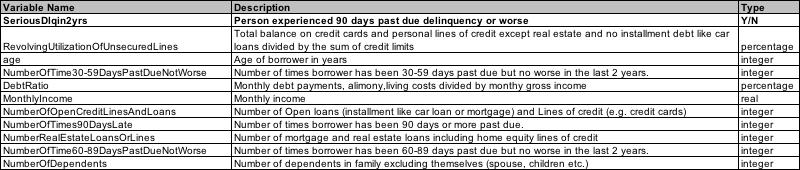

### Import data

In [53]:
cs_test = pd.read_csv('../data/cs-test.csv')
cs_train = pd.read_csv('../data/cs-training.csv')

print('Train Shape: ' + str(cs_train.shape) )
cs_train.head()
# cs_train.columns

Train Shape: (150000, 12)


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


### Summary Statistics

In [6]:
# size of each class
print('Class 1: ' + str(np.sum(cs_train['SeriousDlqin2yrs']) / cs_train.shape[0]) + 
      ' / ' + str(np.sum(cs_train['SeriousDlqin2yrs'])) + ' obs.' ) 
print('Class 0: ' + str((cs_train.shape[0]-np.sum(cs_train['SeriousDlqin2yrs'])) / cs_train.shape[0]) + 
      ' / ' + str((cs_train.shape[0]-np.sum(cs_train['SeriousDlqin2yrs']))) + ' obs.' )

# generate description of df
cs_train.drop(['Unnamed: 0'], axis=1).describe()

Class 1: 0.06684 / 10026 obs.
Class 0: 0.93316 / 139974 obs.


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


Some features have a lot of missing values, such as MonthlyIncome.

In [7]:
# % of NAs in MonthlyIncome
1 - len(cs_train['MonthlyIncome'].dropna()) / len(cs_train['MonthlyIncome'])

0.19820666666666664

### Correlation matrix between features

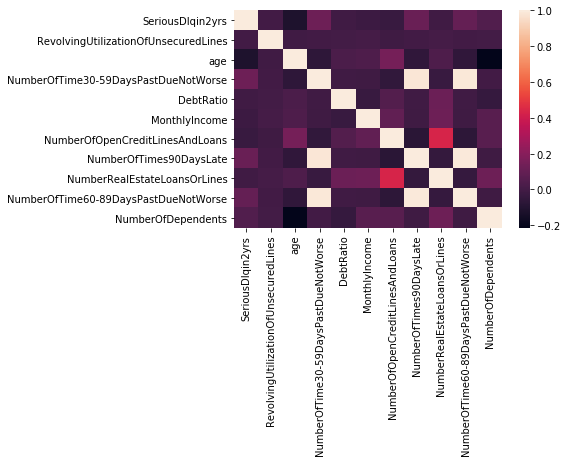

In [8]:
# create copy of cs_train
cs_train_mod = cs_train.drop(['Unnamed: 0'], axis=1, errors = 'ignore').copy()

# calculate the correlation matrix
corr = cs_train_mod.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

### Plotting feature densities per class

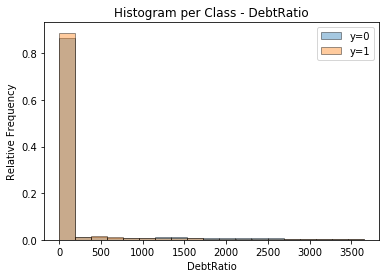

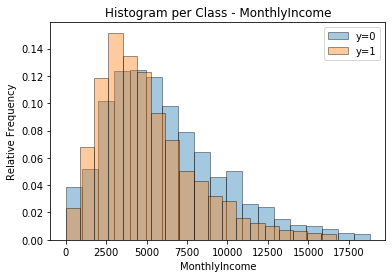

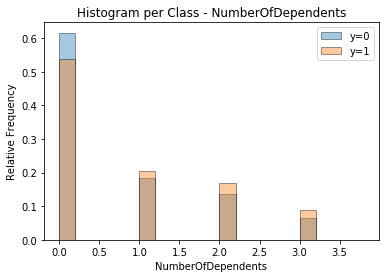

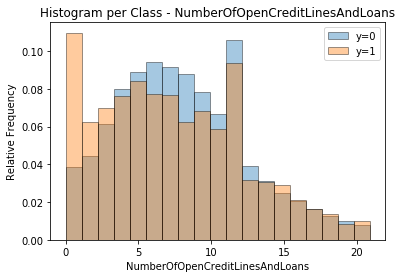

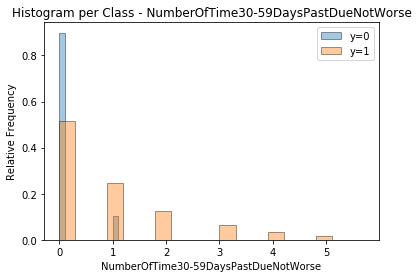

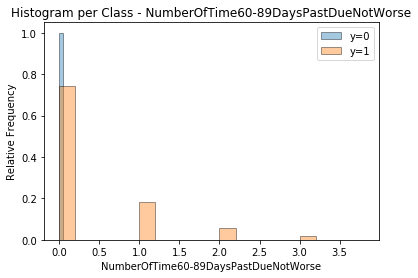

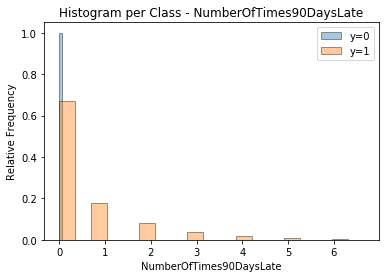

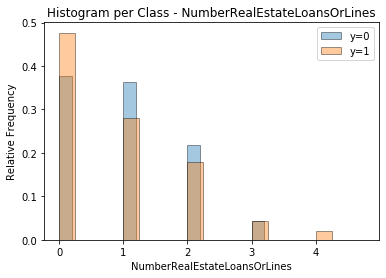

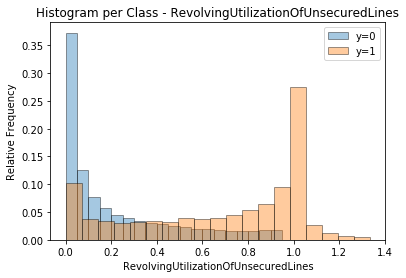

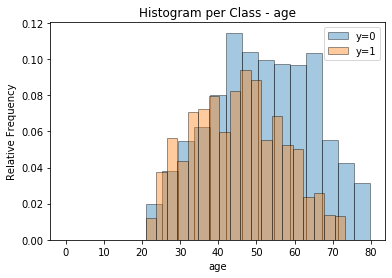

In [9]:
# get all features to iterate over
all_features = np.setdiff1d( cs_train_mod.columns.values, ['Unnamed: 0','SeriousDlqin2yrs'] )

# iterate over each feature
for i_feat in all_features:
    # define total number of bins 
    nbins = 20
    
    # define quantile threshold for range upper bound
    qtle_thres = .98

    # compute bins ranges and step for class 1
    bins_lb_1 = np.min(cs_train_mod[cs_train['SeriousDlqin2yrs'] == 1][i_feat])
    bins_ub_1 = np.nanquantile(cs_train_mod[cs_train['SeriousDlqin2yrs'] == 1][i_feat], qtle_thres )
    bins_range_step_1 = (bins_ub_1 - bins_lb_1) / nbins
    bins_1 = np.arange(bins_lb_1, bins_ub_1, bins_range_step_1)
    hist1, edges1 = np.histogram( cs_train_mod[cs_train_mod['SeriousDlqin2yrs'] == 1][i_feat], bins_1 )
    freq1 = hist1/float(hist1.sum())

    # compute bins ranges and step for class 1
    bins_lb_0 = np.min(cs_train_mod[cs_train_mod['SeriousDlqin2yrs'] == 0][i_feat])
    bins_ub_0 = np.nanquantile(cs_train_mod[cs_train_mod['SeriousDlqin2yrs'] == 0][i_feat], qtle_thres )
    bins_range_step_0 = (bins_ub_0 - bins_lb_0) / nbins
    bins_0 = np.arange(bins_lb_0, bins_ub_0, bins_range_step_0)
    hist0, edges0 = np.histogram( cs_train_mod[cs_train_mod['SeriousDlqin2yrs'] == 0][i_feat], bins_0 )
    freq0 = hist0/float(hist0.sum())

    # plot
    plt.bar(bins_0[:-1],freq0,width=bins_range_step_0, align="edge", ec="k", alpha = .4 )
    plt.bar(bins_1[:-1],freq1,width=bins_range_step_1, align="edge", ec="k", alpha = .4 )
    plt.title('Histogram per Class - ' + i_feat )
    plt.xlabel(i_feat)
    plt.ylabel('Relative Frequency')
    plt.legend(['y=0','y=1'])
    plt.show()

# (2) Feature Engineering

### Steps:
 - (i) Handle missing data
 - (ii) Create new relevant features and transform existing ones in order to facilitate modeling

#### Defining function that does both (i) and (ii)

In [10]:
##
## Create function to transform / create features
##
def featureTransformation(dt):
    
    dt = dt.drop(['Unnamed: 0'], axis=1, errors = 'ignore')
    
    ##
    ## Handle missing data
    ##
    
    # nearest neighbors for MonthlyIncome
    x_income = dt.dropna().drop(['MonthlyIncome','NumberOfDependents','SeriousDlqin2yrs'], axis=1)
    y_income = dt.dropna()[['MonthlyIncome']]
    knn_income = make_pipeline( RobustScaler(), KNeighborsRegressor() )
    knn_income.fit( x_income, y_income )
    imputed_income = knn_income.predict( dt.drop(['MonthlyIncome','NumberOfDependents','SeriousDlqin2yrs'], axis=1) )

    # nearest neighbors for NumberOfDependents
    x_dependents = dt.dropna().drop(['MonthlyIncome','NumberOfDependents','SeriousDlqin2yrs'], axis=1)
    y_dependents = dt.dropna()[['NumberOfDependents']]
    knn_dependents = make_pipeline( RobustScaler(), KNeighborsRegressor() )
    knn_dependents.fit( x_dependents, y_dependents )
    imputed_dependents = knn_dependents.predict( dt.drop(['MonthlyIncome','NumberOfDependents','SeriousDlqin2yrs'], axis=1) )
    
    # fill out missing with predicted values
    dt.loc[dt.MonthlyIncome.isna(),'MonthlyIncome'] = imputed_income[dt.MonthlyIncome.isna()]
    dt.loc[dt.NumberOfDependents.isna(),'NumberOfDependents'] = imputed_dependents[dt.NumberOfDependents.isna()]
    
    ##
    ## Create new features
    ##

    # feature that indicates if the person was ever past due date
    dt['IsEverPastDue'] = (dt['NumberOfTime30-59DaysPastDueNotWorse']>0) | (dt['NumberOfTime60-89DaysPastDueNotWorse']>0) | (dt['NumberOfTimes90DaysLate']>0)

    # feature that indicates total number of times a person is past due
    dt['NumberOfTimesPastDue'] = dt['NumberOfTime30-59DaysPastDueNotWorse'] + dt['NumberOfTime60-89DaysPastDueNotWorse'] + dt['NumberOfTimes90DaysLate']

    # feature that deals with 96/98 values
    dt['IsEverPastDue_9698'] = (dt['NumberOfTime30-59DaysPastDueNotWorse']>=96) | (dt['NumberOfTime60-89DaysPastDueNotWorse']>=96) | (dt['NumberOfTimes90DaysLate']>=96)

    # feature that indicates monthly income per person
    dt['MonthlyIncomePerPerson'] = dt['MonthlyIncome'] / (dt['NumberOfDependents'] + 1)
    
    ##
    ## Limiting values for existing features
    ##
    
    # clip number of times person is past due because of 96/98
    dt['NumberOfTimesPastDue'] = dt['NumberOfTimesPastDue'].clip(0,20)

    # clipping MonthlyIncomePerPerson (0 to 30000)
    dt['MonthlyIncomePerPerson'] = dt['MonthlyIncomePerPerson'].clip(0,30000)

    # clipping MonthlyIncome (0 to 30000)
    dt['MonthlyIncome'] = dt['MonthlyIncome'].clip(0,50000)

    # clipping age (0 to 100)
    dt['age'] = dt['age'].clip(0,100)

    # clipping RevolvingUtilizationOfUnsecuredLines (0 to 3)
    dt['RevolvingUtilizationOfUnsecuredLines'] = dt['RevolvingUtilizationOfUnsecuredLines'].clip(0,3)

    # adjust DebtRatio
    dt['DebtRatio'] = dt['DebtRatio'].clip(0,2)
    
    # return dt
    return dt

In [11]:
cs_train_mod = featureTransformation( cs_train )
cs_train_mod.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,NumberOfTimesPastDue,MonthlyIncomePerPerson
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.00000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,0.326599,52.294887,0.421033,0.682428,5263.65648,8.452760,0.265973,1.018240,0.240387,0.755388,0.436220,3569.888717
std,0.249746,0.376970,14.770770,4.192781,0.722898,5211.43886,5.145951,4.169304,1.129771,4.155179,1.104670,1.378467,3774.807592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,1801.00000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1016.666667
50%,0.000000,0.154181,52.000000,0.000000,0.366508,4423.00000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2666.666667
75%,0.000000,0.559046,63.000000,0.000000,0.868254,7402.00000,11.000000,0.000000,2.000000,0.000000,1.000000,0.000000,5000.000000
max,1.000000,3.000000,100.000000,98.000000,2.000000,50000.00000,58.000000,98.000000,54.000000,98.000000,20.000000,20.000000,30000.000000


#### Compute average value of each feature per class to get a sense of most discerning variables.

In [12]:
cs_train_mod.groupby(['SeriousDlqin2yrs']).mean()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,IsEverPastDue,NumberOfTimesPastDue,IsEverPastDue_9698,MonthlyIncomePerPerson
SeriousDlqin2yrs,,,,,,,,,,,,,,
0,0.299089,52.751039,0.280109,0.681941,5305.640316,8.493620,0.135225,1.020368,0.126666,0.741818,0.168610,0.303228,0.000872,3612.731537
1,0.710672,45.926491,2.388490,0.689221,4677.515899,7.882306,2.091362,0.988530,1.828047,0.944843,0.674446,2.292938,0.014662,2971.755777


#### Correlation matrix between features

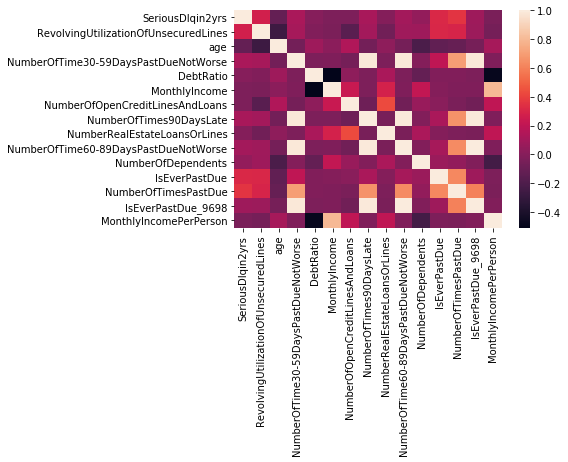

In [13]:
# calculate the correlation matrix
corr = cs_train_mod.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

#### Plotting densities (per class) for a subset of the features

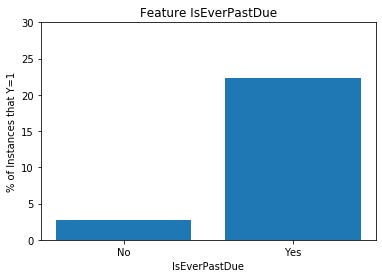

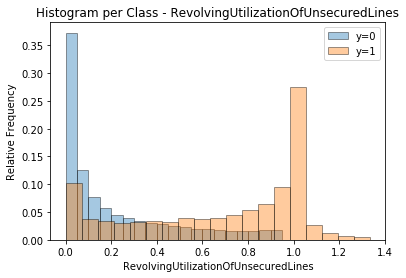

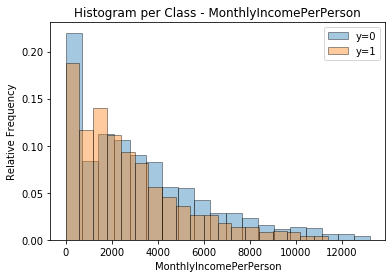

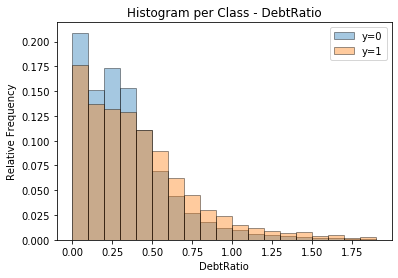

In [14]:
# get all features to iterate over
all_features = np.setdiff1d( cs_train_mod.columns.values, ['Unnamed: 0','SeriousDlqin2yrs'] )
all_features = ['RevolvingUtilizationOfUnsecuredLines',
                'MonthlyIncomePerPerson',
                'DebtRatio']

# print(cs_train_mod.columns)
freq1 = np.nanmean( cs_train_mod[ cs_train_mod['IsEverPastDue'] == 1 ].SeriousDlqin2yrs )
# freq1 = np.nanmean( cs_train_mod[ cs_train_mod['SeriousDlqin2yrs'] == 1 ].IsEverPastDue )
# print(freq1)
freq0 = np.nanmean( cs_train_mod[ cs_train_mod['IsEverPastDue'] == 0 ].SeriousDlqin2yrs )
# freq0 = np.nanmean( cs_train_mod[ cs_train_mod['SeriousDlqin2yrs'] == 0 ].IsEverPastDue )
# print(freq0)

plt.bar(['No','Yes'],[100*freq0,100*freq1])
plt.title('Feature IsEverPastDue')
plt.xlabel('IsEverPastDue')
plt.ylabel('% of Instances that Y=1')
plt.ylim(0,30)
plt.show()

# cs_train_mod.columns

# iterate over each feature
for i_feat in all_features:
    # define total number of bins 
    nbins = 20
    
    # define quantile threshold for range upper bound
    qtle_thres = .98

    # compute bins ranges and step for class 1
    bins_lb_1 = np.min(cs_train_mod[cs_train['SeriousDlqin2yrs'] == 1][i_feat])
    bins_ub_1 = np.nanquantile(cs_train_mod[cs_train['SeriousDlqin2yrs'] == 1][i_feat], qtle_thres )
    bins_range_step_1 = (bins_ub_1 - bins_lb_1) / nbins
    bins_1 = np.arange(bins_lb_1, bins_ub_1, bins_range_step_1)
    hist1, edges1 = np.histogram( cs_train_mod[cs_train_mod['SeriousDlqin2yrs'] == 1][i_feat], bins_1 )
    freq1 = hist1/float(hist1.sum())

    # compute bins ranges and step for class 1
    bins_lb_0 = np.min(cs_train_mod[cs_train_mod['SeriousDlqin2yrs'] == 0][i_feat])
    bins_ub_0 = np.nanquantile(cs_train_mod[cs_train_mod['SeriousDlqin2yrs'] == 0][i_feat], qtle_thres )
    bins_range_step_0 = (bins_ub_0 - bins_lb_0) / nbins
    bins_0 = np.arange(bins_lb_0, bins_ub_0, bins_range_step_0)
    hist0, edges0 = np.histogram( cs_train_mod[cs_train_mod['SeriousDlqin2yrs'] == 0][i_feat], bins_0 )
    freq0 = hist0/float(hist0.sum())

    # plot
    plt.bar(bins_0[:-1],freq0,width=bins_range_step_0, align="edge", ec="k", alpha = .4 )
    plt.bar(bins_1[:-1],freq1,width=bins_range_step_1, align="edge", ec="k", alpha = .4 )
    plt.title('Histogram per Class - ' + i_feat )
    plt.xlabel(i_feat)
    plt.ylabel('Relative Frequency')
    plt.legend(['y=0','y=1'])
    plt.show()

### Dropping (possibly) irrelevant features

In [15]:
cs_train_mod = cs_train_mod.drop(['NumberOfTime30-59DaysPastDueNotWorse',
                                  'NumberOfTime60-89DaysPastDueNotWorse',
                                  'NumberOfTimes90DaysLate'], axis = 1, errors = 'ignore')
cs_train_mod.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,NumberOfTimesPastDue,MonthlyIncomePerPerson
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.00000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,0.326599,52.294887,0.682428,5263.65648,8.452760,1.018240,0.755388,0.436220,3569.888717
std,0.249746,0.376970,14.770770,0.722898,5211.43886,5.145951,1.129771,1.104670,1.378467,3774.807592
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.175074,1801.00000,5.000000,0.000000,0.000000,0.000000,1016.666667
50%,0.000000,0.154181,52.000000,0.366508,4423.00000,8.000000,1.000000,0.000000,0.000000,2666.666667
75%,0.000000,0.559046,63.000000,0.868254,7402.00000,11.000000,2.000000,1.000000,0.000000,5000.000000
max,1.000000,3.000000,100.000000,2.000000,50000.00000,58.000000,54.000000,20.000000,20.000000,30000.000000


# (3) Modeling

## (3.1) Benchmark: Fitting models on raw data
 - no feature engineering 
 - no handling of missing data
 - no dealing with class imbalance

#### Split original data into train and test sets.

In [16]:
###
### Make copy of cs_train
###
X = cs_train.dropna().drop(['SeriousDlqin2yrs'], axis=1).copy()
y = cs_train.dropna()[['SeriousDlqin2yrs']].copy()


###
### shuffle and split training and test sets
###
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,
                                                    np.reshape( y['SeriousDlqin2yrs'].values, (-1,) ), 
                                                    test_size=.20,
                                                    random_state=517,
                                                    stratify = y)

print('Proportion of classes:')
print( Counter(y_train1) )
print( Counter(y_test1) )

Proportion of classes:
Counter({0: 89529, 1: 6686})
Counter({0: 22383, 1: 1671})


#### (3.1.1) DummyClassifier

In [17]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train1, y_train1)
print(classification_report(y_test1, dummy.predict(X_test1)))
print()
print('ROC-AUC: ' + str(roc_auc_score(y_test1, dummy.predict_proba(X_test1)[:,1])))
print()
tn, fp, fn, tp = confusion_matrix(y_test1, dummy.predict(X_test1)).ravel()
cm = pd.DataFrame({'pred':[1,0],'actual_1':[tp,fn],'actual_0':[fp,tn] })
cm

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     22383
           1       0.00      0.00      0.00      1671

    accuracy                           0.93     24054
   macro avg       0.47      0.50      0.48     24054
weighted avg       0.87      0.93      0.90     24054


ROC-AUC: 0.5



/Applications/anaconda3/envs/py37_ml_lab/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,pred,actual_1,actual_0
0,1,0,0
1,0,1671,22383


#### (3.1.2) Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

fit_lr = LogisticRegression()
fit_lr.fit(X_train1, y_train1)
print(classification_report(y_test1, fit_lr.predict(X_test1)))
print()
print('ROC-AUC: ' + str(roc_auc_score(y_test1, fit_lr.predict_proba(X_test1)[:,1])))
print()
tn, fp, fn, tp = confusion_matrix(y_test1, fit_lr.predict(X_test1)).ravel()
cm = pd.DataFrame({'pred':[1,0],'actual_1':[tp,fn],'actual_0':[fp,tn] })
cm

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     22383
           1       0.00      0.00      0.00      1671

    accuracy                           0.93     24054
   macro avg       0.47      0.50      0.48     24054
weighted avg       0.87      0.93      0.90     24054


ROC-AUC: 0.6308994550103253



/Applications/anaconda3/envs/py37_ml_lab/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,pred,actual_1,actual_0
0,1,0,0
1,0,1671,22383


#### (3.1.3) Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train1, y_train1)
print(classification_report(y_test1, tree.predict(X_test1)))
print()
print('ROC-AUC: ' + str(roc_auc_score(y_test1, tree.predict_proba(X_test1)[:,1])))
print()
tn, fp, fn, tp = confusion_matrix(y_test1, tree.predict(X_test1)).ravel()
cm = pd.DataFrame({'pred':[1,0],'actual_1':[tp,fn],'actual_0':[fp,tn] })
cm

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     22383
           1       0.25      0.29      0.27      1671

    accuracy                           0.89     24054
   macro avg       0.60      0.61      0.61     24054
weighted avg       0.90      0.89      0.89     24054


ROC-AUC: 0.6117632153987089



,pred,actual_1,actual_0
0,1,479,1413
1,0,1192,20970


## (3.2) Improving Benchmark: 
- Handles missing data
   - K-Nearest-Neighbors  
- Perform feature transformations and create new features
- Deals with class imbalance
  - SMOTE and custom under/over-sampler

#### Split into train and test sets.

In [20]:
###
### Make copy of cs_train
###
X = cs_train_mod.dropna().drop(['SeriousDlqin2yrs'], axis=1).copy()
y = cs_train_mod.dropna()[['SeriousDlqin2yrs']].copy()


###
### shuffle and split training and test sets
###
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    np.reshape( y['SeriousDlqin2yrs'].values, (-1,) ), 
                                                    test_size=.20,
                                                    random_state=517,
                                                    stratify = y)

print('Proportion of classes pre-SMOTE:')
print( Counter(y_train) )
print( Counter(y_test) )

Proportion of classes pre-SMOTE:
Counter({0: 111979, 1: 8021})
Counter({0: 27995, 1: 2005})


#### Load imbalanced learning packages

In [21]:
# load imblearn packages
from collections import Counter
from imblearn.over_sampling import SMOTE, ADASYN, KMeansSMOTE, SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.pipeline import make_pipeline

#### Original proportion of classes

In [22]:
print('Original proportion of classes:')
print( Counter(y_train) )

Original proportion of classes:
Counter({0: 111979, 1: 8021})


## Different under/over-sampling methodologies

#### (1) SMOTE - Oversample minority class

In [23]:
X_resampled, y_resampled = SMOTE(random_state=123).fit_resample(X_train, y_train)
print('Proportion of classes after SMOTE:')
print( Counter(y_resampled) )

Proportion of classes after SMOTE:
Counter({0: 111979, 1: 111979})


#### (2) SMOTENN - Combination of over and undersampling

In [24]:
X_resampled, y_resampled = SMOTEENN(random_state=123).fit_resample(X_train, y_train)
print('Proportion of classes after SMOTEENN:')
print( Counter(y_resampled) )

Proportion of classes after SMOTEENN:
Counter({1: 92530, 0: 76500})


#### (3) SMOTETomek - Combination of over and undersampling

In [25]:
X_resampled, y_resampled = SMOTETomek(random_state=123).fit_resample(X_train, y_train)
print('Proportion of classes after SMOTEENN:')
print( Counter(y_resampled) )

Proportion of classes after SMOTEENN:
Counter({0: 108873, 1: 108873})


#### (4) Undersampling majority class

In [26]:
X_resampled, y_resampled = RandomUnderSampler(random_state=123).fit_resample(X_train, y_train)
print('Proportion of classes after RandomUnderSampler:')
print( Counter(y_resampled) )

Proportion of classes after RandomUnderSampler:
Counter({0: 8021, 1: 8021})


#### (5) Custom made under-sampler + SMOTE

In [27]:
##
## Create custom made under-oversampler
##
class CustomUnderOverSampler:
    
    def __init__(self, mult = .5, replace = False, random_state=42):
        self.mult = mult # mult is the proportion of the majority class that should be kept
        self.replace = replace
        self.random_state = random_state
    
    def fit_resample(self, x, y):
        
        ##
        ## Under-sampling step
        
        x = pd.DataFrame(x)
        
        # count number of positive/negative instances
        len_pos = np.sum( y == 1 )
        len_neg = np.sum( y == 0 )
        
        # sample subset of negative instances
        X_neg = x[ y == 0 ].sample(n = int( self.mult * (len_neg) ),
                                   replace=self.replace, 
                                   random_state=self.random_state).copy()
        X_neg['target'] = 0

        X_pos = x[ y == 1 ].copy()
        X_pos['target'] = 1

        # append positive and negative parts
        X_train_tmp = X_neg.append( X_pos, ignore_index=True )

        ##
        ## Over-sampling step with SMOTE
        X_resampled, y_resampled = SMOTE(random_state=self.random_state).fit_resample(X_train_tmp.drop('target', axis=1), 
                                                                                      X_train_tmp['target'])
        
        # return
        return X_resampled, y_resampled
    

X_resampled, y_resampled = CustomUnderOverSampler().fit_resample(X_train, y_train)
print('Proportion of classes after CustomUnderOverSampler:')
print( Counter(y_resampled) )    

Proportion of classes after CustomUnderOverSampler:
Counter({0: 55989, 1: 55989})


## (3.2.1) Logistic Regression

### (i) Pipeline: StandardScaler() -> SMOTE() -> LogisticRegression()

In [28]:
from sklearn.linear_model import LogisticRegression

# Create pipeline
pipe_smote_lr = make_pipeline( StandardScaler(), 
                              SMOTE(random_state=42), 
                              LogisticRegression() )

pipe_smote_lr.fit(X_train, y_train)
print(classification_report(y_test, pipe_smote_lr.predict(X_test)))
print()
print('Test Set - F1 score: ' + str(f1_score(y_test, pipe_smote_lr.predict(X_test))) )
print('Test Set - AUC score: ' + str(roc_auc_score(y_test, pipe_smote_lr.predict_proba(X_test)[:,1])) )

tn, fp, fn, tp = confusion_matrix(y_test, pipe_smote_lr.predict(X_test)).ravel()
cm = pd.DataFrame({'pred':[1,0],'actual_1':[tp,fn],'actual_0':[fp,tn] })
cm

              precision    recall  f1-score   support

           0       0.98      0.80      0.88     27995
           1       0.21      0.75      0.33      2005

    accuracy                           0.80     30000
   macro avg       0.60      0.78      0.61     30000
weighted avg       0.93      0.80      0.85     30000


Test Set - F1 score: 0.3337780742717367
Test Set - AUC score: 0.8559914911773968


,pred,actual_1,actual_0
0,1,1501,5488
1,0,504,22507


### (ii) Pipeline: StandardScaler() -> CustomUnderOverSampler(mult=.1) -> LogisticRegression()

In [29]:
from sklearn.linear_model import LogisticRegression

# Create pipeline
pipe_custom_lr = make_pipeline( StandardScaler(), 
                               CustomUnderOverSampler(random_state=42, mult=.1), 
                               LogisticRegression() )

pipe_custom_lr.fit(X_train, y_train)

print(classification_report(y_test, pipe_custom_lr.predict(X_test)))
print()
print('Test Set - F1 score: ' + str(f1_score(y_test, pipe_custom_lr.predict(X_test))) )
print('Test Set - AUC score: ' + str(roc_auc_score(y_test, pipe_custom_lr.predict_proba(X_test)[:,1])) )

tn, fp, fn, tp = confusion_matrix(y_test, pipe_custom_lr.predict(X_test)).ravel()
cm = pd.DataFrame({'pred':[1,0],'actual_1':[tp,fn],'actual_0':[fp,tn] })
cm


              precision    recall  f1-score   support

           0       0.98      0.81      0.88     27995
           1       0.22      0.74      0.33      2005

    accuracy                           0.80     30000
   macro avg       0.60      0.78      0.61     30000
weighted avg       0.93      0.80      0.85     30000


Test Set - F1 score: 0.334228788896351
Test Set - AUC score: 0.8559197469801118


,pred,actual_1,actual_0
0,1,1493,5436
1,0,512,22559


### Defining classification thresholds based on maximum F1 score for pipeline (ii).

In [30]:
from sklearn.metrics import f1_score, precision_score, recall_score
# define thresholds
thresholds = np.arange(0, .999, 0.001)
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

# evaluate each threshold
lr_probs_custom = pipe_custom_lr.predict_proba(X_test)[:,1]
# apply threshold to positive probabilities to create labels
lr_scores_custom = [f1_score(y_test, to_labels(lr_probs_custom, t)) for t in thresholds]
lr_precision_custom = [precision_score(y_test, to_labels(lr_probs_custom, t)) for t in thresholds]
lr_recall_custom = [recall_score(y_test, to_labels(lr_probs_custom, t)) for t in thresholds]
# get best threshold
ix_custom = np.argmax(lr_scores_custom)
print('Custom - Threshold=%.3f, F1-Score=%.5f' % (thresholds[ix_custom], lr_scores_custom[ix_custom]))
print('Custom - Threshold=%.3f, Precision=%.5f' % (thresholds[ix_custom], lr_precision_custom[ix_custom]))
print('Custom - Threshold=%.3f, Recall=%.5f' % (thresholds[ix_custom], lr_recall_custom[ix_custom]))

Custom - Threshold=0.795, F1-Score=0.43372
Custom - Threshold=0.795, Precision=0.38429
Custom - Threshold=0.795, Recall=0.49776


### Analysing precision/recall/F1 score at different classification thresholds.

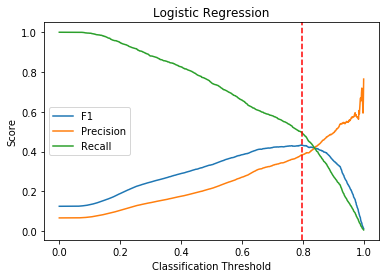

In [31]:
from sklearn.metrics import f1_score, precision_score, recall_score
# define thresholds
thresholds = np.arange(0, .999, 0.001)
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

plt.plot(thresholds, lr_scores_custom)
plt.plot(thresholds, lr_precision_custom)
plt.plot(thresholds, lr_recall_custom)
plt.axvline(x=thresholds[ix_custom], ymin=0, ymax=1, ls='--', color='red')
plt.legend(['F1','Precision','Recall'] )#, loc='upper right')
plt.xlabel('Classification Threshold')
plt.ylabel('Score')
plt.title('Logistic Regression')
plt.show()

### ROC Curve

AUC = 0.8559197469801118


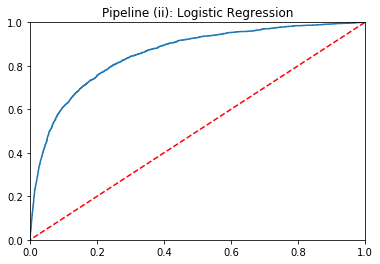

In [32]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, ls='--', color='red')

from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test,pipe_custom_lr.predict_proba(X_test)[:,1])

print( 'AUC = ' + str(roc_auc_score(y_test, pipe_custom_lr.predict_proba(X_test)[:,1])) )

plt.plot(fpr,tpr)
abline(1,0)
plt.ylim(0,1)
plt.xlim(0,1)
plt.title('Pipeline (ii): Logistic Regression')
plt.show()

### Regression coefficients

In [33]:
dt_lr_coefs = pd.DataFrame({'feature':X_train.columns,
                            'coefficient':pipe_custom_lr[2].coef_.ravel()})
dt_lr_coefs#.sort_values('coefficient', ascending=False)

,feature,coefficient
0,RevolvingUtilizationOfUnsecuredLines,0.710606
1,age,-0.318977
2,DebtRatio,-0.027694
3,MonthlyIncome,-0.082668
4,NumberOfOpenCreditLinesAndLoans,0.120276
5,NumberRealEstateLoansOrLines,0.156735
6,NumberOfDependents,-0.005610
7,IsEverPastDue,0.363331
8,NumberOfTimesPastDue,0.591193
9,IsEverPastDue_9698,-0.309390


## (3.2.2) Decision Tree

### (i) Pipeline: SMOTE() -> DecisionTreeClassifier()

In [34]:
from sklearn.tree import DecisionTreeClassifier
# Create pipeline
pipe_smote_tree = make_pipeline( SMOTE(random_state=42), 
                                 DecisionTreeClassifier() )

pipe_smote_tree.fit(X_train, y_train)
print(classification_report(y_test, pipe_smote_tree.predict(X_test)))
print()
print('Test Set - F1 score: ' + str(f1_score(y_test, pipe_smote_tree.predict(X_test))) )
print('Test Set - AUC score: ' + str(roc_auc_score(y_test, pipe_smote_tree.predict_proba(X_test)[:,1])) )

tn, fp, fn, tp = confusion_matrix(y_test, pipe_smote_tree.predict(X_test)).ravel()
cm = pd.DataFrame({'pred':[1,0],'actual_1':[tp,fn],'actual_0':[fp,tn] })
cm

              precision    recall  f1-score   support

           0       0.96      0.86      0.91     27995
           1       0.19      0.45      0.27      2005

    accuracy                           0.84     30000
   macro avg       0.57      0.66      0.59     30000
weighted avg       0.91      0.84      0.86     30000


Test Set - F1 score: 0.2686787986388519
Test Set - AUC score: 0.6593102794006234


,pred,actual_1,actual_0
0,1,908,3846
1,0,1097,24149


### (ii) Pipeline: CustomUnderOverSampler() -> DecisionTreeClassifier()

In [35]:
# Create pipeline
pipe_custom_tree = make_pipeline( CustomUnderOverSampler(random_state=42), 
                                  DecisionTreeClassifier() )

pipe_custom_tree.fit(X_train, y_train)

print(classification_report(y_test, pipe_custom_tree.predict(X_test)))
print()
print('Test Set - F1 score: ' + str(f1_score(y_test, pipe_custom_tree.predict(X_test))) )
print('Test Set - AUC score: ' + str(roc_auc_score(y_test, pipe_custom_tree.predict_proba(X_test)[:,1])) )

tn, fp, fn, tp = confusion_matrix(y_test, pipe_custom_tree.predict(X_test)).ravel()
cm = pd.DataFrame({'pred':[1,0],'actual_1':[tp,fn],'actual_0':[fp,tn] })
cm

              precision    recall  f1-score   support

           0       0.96      0.83      0.89     27995
           1       0.18      0.52      0.27      2005

    accuracy                           0.81     30000
   macro avg       0.57      0.68      0.58     30000
weighted avg       0.91      0.81      0.85     30000


Test Set - F1 score: 0.26810201204664874
Test Set - AUC score: 0.6773075348777549


,pred,actual_1,actual_0
0,1,1046,4752
1,0,959,23243


### Defining classification thresholds based on maximum F1 score for pipeline (ii).

In [36]:
# define thresholds
thresholds = np.arange(0, 1, 0.001)
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

# evaluate each threshold
tree_probs_custom = pipe_custom_tree.predict_proba(X_test)[:,1]
# apply threshold to positive probabilities to create labels
tree_scores_custom = [f1_score(y_test, to_labels(tree_probs_custom, t)) for t in thresholds]
tree_precision_custom = [precision_score(y_test, to_labels(tree_probs_custom, t)) for t in thresholds]
tree_recall_custom = [recall_score(y_test, to_labels(tree_probs_custom, t)) for t in thresholds]
# get best threshold
ix_custom = np.argmax(tree_scores_custom)
print('Custom - Threshold=%.3f, F1-Score=%.5f' % (thresholds[ix_custom], tree_scores_custom[ix_custom]))
print('Custom - Threshold=%.3f, Precision=%.5f' % (thresholds[ix_custom], tree_precision_custom[ix_custom]))
print('Custom - Threshold=%.3f, Recall=%.5f' % (thresholds[ix_custom], tree_recall_custom[ix_custom]))

Custom - Threshold=0.084, F1-Score=0.26910
Custom - Threshold=0.084, Precision=0.18090
Custom - Threshold=0.084, Recall=0.52519


## (3.2.3) Random Forest


#### SMOTE

In [37]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# define grid of parameters to search on
new_params = {'randomforestclassifier__n_estimators': [300,400],
              'randomforestclassifier__max_features': ['sqrt',4,5] }
 
##    
## Best parameters according to auc and 5-fold CV
# {'randomforestclassifier__class_weight': {0: 1, 1: 1},
#  'randomforestclassifier__max_features': 'sqrt',
#  'randomforestclassifier__n_estimators': 400}

# define pipeline
pipe_smote_rf = make_pipeline( SMOTE(random_state=42),
                               RandomForestClassifier(random_state=123))

# instantiate grid search
smote_search = GridSearchCV(pipe_smote_rf,
                            param_grid=new_params,
                            cv = 5,
                            scoring = 'f1',
                            verbose=2,
                            n_jobs = -1,
                            refit=True)

smote_search.fit(X_train, y_train)

print(classification_report(y_test, smote_search.predict(X_test)))
print()
print('Test Set - F1 score: ' + str(f1_score(y_test, smote_search.predict(X_test))) )
print('Test Set - AUC score: ' + str(roc_auc_score(y_test, smote_search.predict_proba(X_test)[:,1])) )

tn, fp, fn, tp = confusion_matrix(y_test, smote_search.predict(X_test)).ravel()
cm = pd.DataFrame({'pred':[1,0],'actual_1':[tp,fn],'actual_0':[fp,tn] })
cm

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 34.4min finished


              precision    recall  f1-score   support

           0       0.96      0.91      0.94     27995
           1       0.30      0.53      0.38      2005

    accuracy                           0.88     30000
   macro avg       0.63      0.72      0.66     30000
weighted avg       0.92      0.88      0.90     30000


Test Set - F1 score: 0.38168485065283486
Test Set - AUC score: 0.8333705564629239


,pred,actual_1,actual_0
0,1,1067,2519
1,0,938,25476


#### Hyperparameters defined by cross-validation.

In [38]:
# from sklearn.metrics import SCORERS
# SCORERS.keys()
smote_search.best_params_

{'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__n_estimators': 400}

#### Defining classification thresholds based on maximum F1-score for random forest (with SMOTE)

In [39]:
from sklearn.metrics import f1_score, precision_score, recall_score
# define thresholds
thresholds = np.arange(0, 1, 0.001)
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

# define pipeline
pipe_smote_rf = make_pipeline( SMOTE(random_state=42), 
                                RandomForestClassifier(random_state=123, 
                                                      max_features = smote_search.best_params_['randomforestclassifier__max_features'], 
                                                      n_estimators=smote_search.best_params_['randomforestclassifier__n_estimators']) )

pipe_smote_rf.fit(X_train, y_train)

# evaluate each threshold
rf_probs_smote = pipe_smote_rf.predict_proba(X_test)[:,1]
# apply threshold to positive probabilities to create labels
rf_scores_smote = [f1_score(y_test, to_labels(rf_probs_smote, t)) for t in thresholds]
rf_precision_smote = [precision_score(y_test, to_labels(rf_probs_smote, t)) for t in thresholds]
rf_recall_smote = [recall_score(y_test, to_labels(rf_probs_smote, t)) for t in thresholds]
# get best threshold
ix_smote = np.argmax(rf_scores_smote)
print('SMOTE - Threshold=%.3f, F1-Score=%.5f' % (thresholds[ix_smote], rf_scores_smote[ix_smote]))
print('SMOTE - Threshold=%.3f, Precision=%.5f' % (thresholds[ix_smote], rf_precision_smote[ix_smote]))
print('SMOTE - Threshold=%.3f, Recall=%.5f' % (thresholds[ix_smote], rf_recall_smote[ix_smote]))


SMOTE - Threshold=0.503, F1-Score=0.38218
SMOTE - Threshold=0.503, Precision=0.29862
SMOTE - Threshold=0.503, Recall=0.53067


#### Defining classification thresholds based on maximum F1-score for random forest (with CustomUnderOverSampler)

In [40]:
from sklearn.metrics import f1_score, precision_score, recall_score
# define thresholds
thresholds = np.arange(0, 1, 0.001)
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

# define pipeline
pipe_custom_rf = make_pipeline( CustomUnderOverSampler(random_state=42), 
                                RandomForestClassifier(random_state=123, 
                                                      max_features = 'sqrt', 
                                                      n_estimators=400) )

pipe_custom_rf.fit(X_train, y_train)

# evaluate each threshold
rf_probs_custom = pipe_custom_rf.predict_proba(X_test)[:,1]
# apply threshold to positive probabilities to create labels
rf_scores_custom = [f1_score(y_test, to_labels(rf_probs_custom, t)) for t in thresholds]
rf_precision_custom = [precision_score(y_test, to_labels(rf_probs_custom, t)) for t in thresholds]
rf_recall_custom = [recall_score(y_test, to_labels(rf_probs_custom, t)) for t in thresholds]
# get best threshold
ix_custom = np.argmax(rf_scores_custom)
print('Custom - Threshold=%.3f, F1-Score=%.5f' % (thresholds[ix_custom], rf_scores_custom[ix_custom]))
print('Custom - Threshold=%.3f, Precision=%.5f' % (thresholds[ix_custom], rf_precision_custom[ix_custom]))
print('Custom - Threshold=%.3f, Recall=%.5f' % (thresholds[ix_custom], rf_recall_custom[ix_custom]))

Custom - Threshold=0.587, F1-Score=0.39359
Custom - Threshold=0.587, Precision=0.31193
Custom - Threshold=0.587, Recall=0.53317


#### Analysing precision/recall/F1 at different classification thresholds and ROC Curve.

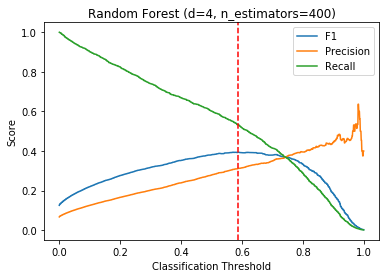


0.8406277661801917


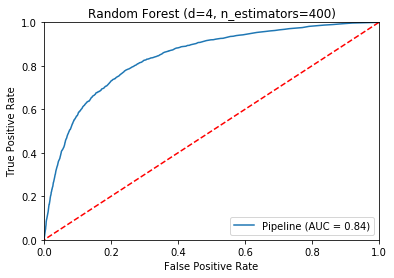

In [41]:
plt.plot(thresholds, rf_scores_custom)
plt.plot(thresholds, rf_precision_custom)
plt.plot(thresholds, rf_recall_custom)
plt.axvline(x=thresholds[ix_custom], ymin=0, ymax=1, ls='--', color='red')
plt.legend(['F1','Precision','Recall'] )#, loc='upper right')
plt.xlabel('Classification Threshold')
plt.ylabel('Score')
plt.title('Random Forest (d=4, n_estimators=400)')
plt.show()

from sklearn.metrics import plot_roc_curve
print()
pipe_custom_lr_auc =  roc_auc_score(y_test,pipe_custom_rf.predict_proba(X_test)[:,1])
print( pipe_custom_lr_auc )
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, ls='--', color='red')

plot_roc_curve(pipe_custom_rf, X_test, y_test)  # doctest: +SKIP
abline(1,0)
plt.ylim(0,1)
plt.xlim(0,1)
plt.title('Random Forest (d=4, n_estimators=400)')
# plt.legend('Lo')
plt.show()

### Feature importances

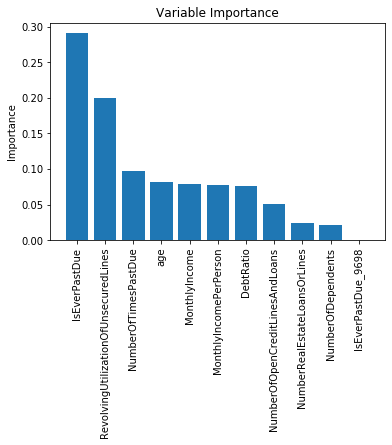

,feature,importance
7,IsEverPastDue,0.290863
0,RevolvingUtilizationOfUnsecuredLines,0.200301
8,NumberOfTimesPastDue,0.097551
1,age,0.081707
3,MonthlyIncome,0.079352
10,MonthlyIncomePerPerson,0.077436
2,DebtRatio,0.075518
4,NumberOfOpenCreditLinesAndLoans,0.050829
5,NumberRealEstateLoansOrLines,0.024631
6,NumberOfDependents,0.021493


In [42]:
dt_importance = pd.DataFrame({'feature':X_train.columns, 
                              'importance':pipe_custom_rf[1].feature_importances_})
dt_importance = dt_importance.sort_values('importance', ascending=False)

plt.bar(dt_importance.feature, dt_importance.importance)
plt.title('Variable Importance')
plt.ylabel('Importance')
plt.xticks(rotation='vertical')
plt.show()

dt_importance

## (3.3) XGBoost

In [43]:
XGBClassifier().get_params().keys()

dict_keys(['base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'n_estimators', 'n_jobs', 'nthread', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'seed', 'silent', 'subsample', 'verbosity'])

#### Hyperparameter tuning via grid search

In [44]:
##
## Imported libs
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

##
## Random Search
# params = {
#         'min_child_weight': [1, 5, 10],
#         'gamma': [0.5, 1, 1.5, 2, 5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 4, 5]
#         }

params = { 'booster': ['gbtree'],#, 'gblinear', 'dart'],
           'n_estimators': [75,100,200,300],
           'colsample_bytree': [0.6, 0.8, 1.0]}

from sklearn.metrics import f1_score, precision_score, recall_score
# define thresholds
thresholds = np.arange(0, 1, 0.001)
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

for i_booster in params['booster']:
    
    for i_n_estimators in params['n_estimators']:
        
        for i_colsample_bytree in params['colsample_bytree']:
        
            pipe_smote_xgb = make_pipeline(StandardScaler(), 
                                           SMOTE(random_state=42), 
#                                            CustomUnderOverSampler(random_state=42),
                                           XGBClassifier(random_state=42,
                                                         n_estimators=i_n_estimators,
                                                         booster=i_booster,
                                                         colsample_bytree = i_colsample_bytree) )

            pipe_smote_xgb.fit(X_train,y_train)

            print()
            print('booster: ' + i_booster)  
            print('n_estimators: ' + str(i_n_estimators) )
            print('colsample_bytree: ' + str(i_colsample_bytree) )
            print('AUC score: ' + str(roc_auc_score(y_test, pipe_smote_xgb.predict_proba(X_test)[:,1])) )
            print('Threshold=0.5 - F1-score= ' + str(f1_score(y_test, pipe_smote_xgb.predict(X_test))) )
            
            # get threshold based on best F1
            xgb_probs_smote = pipe_smote_xgb.predict_proba(X_test)[:,1]
            xgb_scores_smote = [f1_score(y_test, to_labels(xgb_probs_smote, t)) for t in thresholds]
            ix_custom = np.argmax(xgb_scores_smote)
            print('Threshold=%.3f, F1-Score=%.5f' % (thresholds[ix_custom], xgb_scores_smote[ix_custom]))


# print(classification_report(y_test, pipe_smote_xgb.predict(X_test)))
# print()
# print('AUC score: ' + str(roc_auc_score(y_test, pipe_smote_xgb.predict_proba(X_test)[:,1])) )
# print('F1 score: ' + str(f1_score(y_test, pipe_smote_xgb.predict(X_test))) )
# print()


booster: gbtree
n_estimators: 75
colsample_bytree: 0.6
AUC score: 0.8563336167529025
Threshold=0.5 - F1-score= 0.3591805957018977
Threshold=0.729, F1-Score=0.43529

booster: gbtree
n_estimators: 75
colsample_bytree: 0.8
AUC score: 0.8564362535347646
Threshold=0.5 - F1-score= 0.35360849625874974
Threshold=0.734, F1-Score=0.43768

booster: gbtree
n_estimators: 75
colsample_bytree: 1.0
AUC score: 0.8552664596768482
Threshold=0.5 - F1-score= 0.33035129827623827
Threshold=0.761, F1-Score=0.43547

booster: gbtree
n_estimators: 100
colsample_bytree: 0.6
AUC score: 0.8564253680854124
Threshold=0.5 - F1-score= 0.36354180210635806
Threshold=0.720, F1-Score=0.43607

booster: gbtree
n_estimators: 100
colsample_bytree: 0.8
AUC score: 0.8559192659537084
Threshold=0.5 - F1-score= 0.35772155054219124
Threshold=0.740, F1-Score=0.43628

booster: gbtree
n_estimators: 100
colsample_bytree: 1.0
AUC score: 0.8549303914708675
Threshold=0.5 - F1-score= 0.3300970873786408
Threshold=0.761, F1-Score=0.43502

bo

#### Fit final model with selected hyperparameters

In [45]:
# booster: gbtree
# n_estimators: 100
# colsample_bytree: 0.6    

from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

booster_best = 'gbtree'
n_estimators_best = 75
colsample_bytree_best =  0.8

# define pipeline with best parameters
pipe_smote_xgb = make_pipeline(StandardScaler(), 
                               SMOTE(random_state=42),
#                                CustomUnderOverSampler(random_state=42),
                               XGBClassifier(random_state=42,
                                             n_estimators = n_estimators_best,
                                             booster = booster_best,
                                             colsample_bytree = colsample_bytree_best) )

# fit
pipe_smote_xgb.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('smote', SMOTE(random_state=42)),
                ('xgbclassifier',
                 XGBClassifier(colsample_bytree=0.8, n_estimators=75,
                               random_state=42))])

#### Analysing precision/recall/F1 at different classification thresholds and ROC Curve.

In [46]:
# get threshold based on best F1
from sklearn.metrics import f1_score, precision_score, recall_score
# define thresholds
thresholds = np.arange(0, 1, 0.001)
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

xgb_probs_smote = pipe_smote_xgb.predict_proba(X_test)[:,1]
xgb_scores_smote = [f1_score(y_test, to_labels(xgb_probs_smote, t)) for t in thresholds]
xgb_precision_smote = [precision_score(y_test, to_labels(xgb_probs_smote, t)) for t in thresholds]
xgb_recall_smote = [recall_score(y_test, to_labels(xgb_probs_smote, t)) for t in thresholds]
ix_custom = np.argmax(xgb_scores_smote)
print('Threshold=%.3f, F1-Score=%.5f' % (thresholds[ix_custom], xgb_scores_smote[ix_custom]))
print()
print(classification_report(y_test, to_labels(xgb_probs_smote, thresholds[ix_custom])))

/Applications/anaconda3/envs/py37_ml_lab/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Threshold=0.734, F1-Score=0.43768

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     27995
           1       0.39      0.49      0.44      2005

    accuracy                           0.92     30000
   macro avg       0.68      0.72      0.70     30000
weighted avg       0.92      0.92      0.92     30000



#### Cross-validated AUC scores.

In [47]:
scores = cross_val_score( pipe_smote_xgb, X, y.values.ravel(), scoring = 'roc_auc' )
print(scores)
print(np.mean(scores))

[0.85290041 0.8520081  0.85686792 0.85590483 0.86267747]
0.8560717458767659


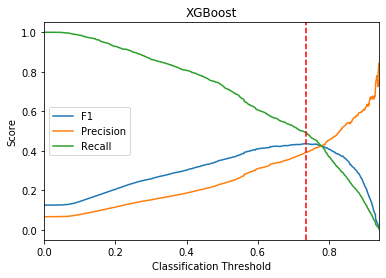


0.8564362535347646


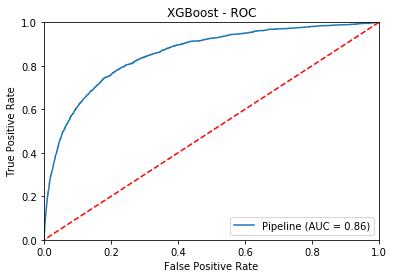

In [48]:
plt.plot(thresholds, xgb_scores_smote)
plt.plot(thresholds, xgb_precision_smote)
plt.plot(thresholds, xgb_recall_smote)
plt.axvline(x=thresholds[ix_custom], ymin=0, ymax=1, ls='--', color='red')
plt.legend(['F1','Precision','Recall'] )#, loc='upper right')
plt.xlabel('Classification Threshold')
plt.ylabel('Score')
plt.xlim(0,.94)
plt.title('XGBoost')
plt.show()

from sklearn.metrics import plot_roc_curve
print()
pipe_smote_xgb_auc =  roc_auc_score(y_test,pipe_smote_xgb.predict_proba(X_test)[:,1])
print( pipe_smote_xgb_auc )
def abline(slope, intercept):
    """Plot a line from slope and intercept"""4
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, ls='--', color='red')

plot_roc_curve(pipe_smote_xgb, X_test, y_test)  # doctest: +SKIP
abline(1,0)
plt.ylim(0,1)
plt.xlim(0,1)
plt.title('XGBoost - ROC')
plt.show()


#### Feature Importance

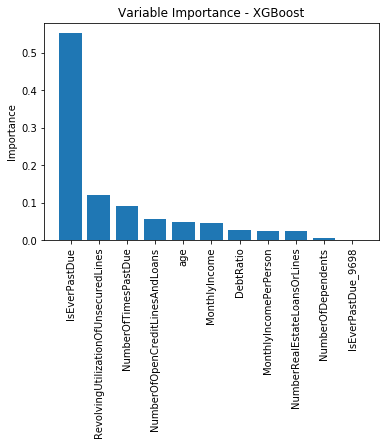

In [49]:
df_xgb_importances = pd.DataFrame({'feature':X_train.columns,
                                   'importance':pipe_smote_xgb[2].feature_importances_})

df_xgb_importances = df_xgb_importances.sort_values('importance', ascending = False)

plt.bar(df_xgb_importances.feature, df_xgb_importances.importance)
plt.title('Variable Importance - XGBoost')
plt.ylabel('Importance')
plt.xticks(rotation='vertical')
plt.show()


## (4) Comparing Approaches

In [64]:
from sklearn.metrics import roc_curve

# bench LR
fpr_lr_bench, tpr_lr_bench, _ = roc_curve(y_test1, fit_lr.predict_proba(X_test1)[:,1])
auc_lr_bench = roc_auc_score(y_test1, fit_lr.predict_proba(X_test1)[:,1])

# bench TREE
fpr_tree_bench, tpr_tree_bench, _ = roc_curve(y_test1, tree.predict_proba(X_test1)[:,1])
auc_tree_bench = roc_auc_score(y_test1, tree.predict_proba(X_test1)[:,1])

# BEST LR
fpr_lr, tpr_lr, _ = roc_curve(y_test, pipe_custom_lr.predict_proba(X_test)[:,1])
auc_lr = roc_auc_score(y_test, pipe_custom_lr.predict_proba(X_test)[:,1])

# BEST RF
fpr_rf, tpr_rf, _ = roc_curve(y_test,  pipe_custom_rf.predict_proba(X_test)[:,1])
auc_rf = roc_auc_score(y_test, pipe_custom_rf.predict_proba(X_test)[:,1])

# BEST XGB
fpr_xgb, tpr_xgb, _ = roc_curve(y_test,  pipe_smote_xgb.predict_proba(X_test)[:,1])
auc_xgb = roc_auc_score(y_test, pipe_smote_xgb.predict_proba(X_test)[:,1])


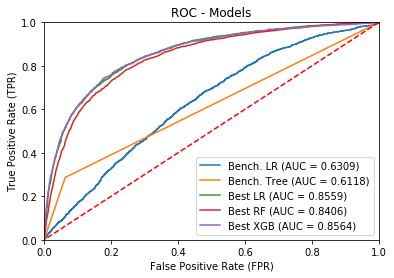

In [65]:

plt.plot(fpr_lr_bench,tpr_lr_bench)
plt.plot(fpr_tree_bench,tpr_tree_bench)
plt.plot(fpr_lr,tpr_lr)
plt.plot(fpr_rf,tpr_rf)
plt.plot(fpr_xgb,tpr_xgb)
abline(1,0)
plt.title('ROC - Models')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.ylim(0,1)
plt.xlim(0,1)
plt.legend(['Bench. LR (AUC = '+str(np.round(auc_lr_bench, 4))+')',
            'Bench. Tree (AUC = '+str(np.round(auc_tree_bench, 4))+')',
            'Best LR (AUC = '+str(np.round(auc_lr, 4))+')',
            'Best RF (AUC = '+str(np.round(auc_rf, 4))+')',
            'Best XGB (AUC = '+str(np.round(auc_xgb, 4))+')'] )
plt.show()